# Novartis Data Science Hiring Challenge

### Step 1: Importing and Merging Data

In [2]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
%matplotlib inline

import os
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Importing all datasets

train = pd.read_csv("Dataset/Train.csv")
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [5]:
test = pd.read_csv("Dataset/Test.csv")
test.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,CR_195453,01-FEB-18,0,30,35,7,3,6,4,0,5,1,174,NaN,72,119,23
1,CR_103520,05-MAR-04,0,44,44,1,3,7,1,4,6,1,316,0.0,12,29,34
2,CR_196089,27-JAN-18,0,34,33,3,5,2,7,3,0,1,316,1.0,72,0,34
3,CR_112195,18-AUG-06,7,3,2,3,5,9,8,0,5,1,174,1.0,112,87,34
4,CR_149832,31-OCT-11,0,7,8,7,3,2,7,1,5,1,174,0.0,112,93,43


In [6]:
sample = pd.read_csv("Dataset/sample_submission.csv")
sample.head()

,INCIDENT_ID,MULTIPLE_OFFENSE
0,CR_195453,1
1,CR_103520,0
2,.,.
3,.,.
4,CR_196089,1


### Step 2: Inspecting the Dataframe

In [7]:
train.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


In [8]:
# Check the dimensions of the dataframe

train.shape

(23856, 18)

In [9]:
# Look at the statistical aspects of the dataframe

train.describe()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000
max,7.000000,52.000000,52.000000,10.000000,5.000000,19.000000,18.000000,99.000000,6.000000,90.000000,332.000000,90.000000,116.000000,142.000000,50.000000,1.000000


In [10]:
# MULTIPLE_OFFENSE distribution

train.MULTIPLE_OFFENSE.value_counts()

1    22788
0     1068
Name: MULTIPLE_OFFENSE, dtype: int64

In [11]:
# see the type of each column

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23856 entries, 0 to 23855
Data columns (total 18 columns):
INCIDENT_ID         23856 non-null object
DATE                23856 non-null object
X_1                 23856 non-null int64
X_2                 23856 non-null int64
X_3                 23856 non-null int64
X_4                 23856 non-null int64
X_5                 23856 non-null int64
X_6                 23856 non-null int64
X_7                 23856 non-null int64
X_8                 23856 non-null int64
X_9                 23856 non-null int64
X_10                23856 non-null int64
X_11                23856 non-null int64
X_12                23674 non-null float64
X_13                23856 non-null int64
X_14                23856 non-null int64
X_15                23856 non-null int64
MULTIPLE_OFFENSE    23856 non-null int64
dtypes: float64(1), int64(15), object(2)
memory usage: 3.3+ MB


In [12]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
train.iloc[:,2:-1].describe(percentiles=[.25, .5, .75, .90, .95, .99])

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
count,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000
mean,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747
std,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000
50%,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000
75%,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000
90%,1.000000,45.000000,45.000000,9.000000,5.000000,15.000000,10.000000,2.000000,6.000000,2.000000,316.000000,2.000000,112.000000,142.000000,43.000000
95%,3.000000,49.000000,49.000000,10.000000,5.000000,15.000000,12.000000,3.000000,6.000000,2.000000,316.000000,2.000000,112.000000,142.000000,46.000000
99%,7.000000,50.000000,50.000000,10.000000,5.000000,17.000000,17.000000,5.000000,6.000000,4.000000,316.000000,4.000000,116.000000,142.000000,48.000000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

``INCIDENT_ID`` and ``DATE`` are object columns. Rest all are numberical

In [13]:
# Null count function. Will return column and their % null values

def null_finder(x):
    null_df = pd.DataFrame(x.isnull().sum()*100/x.shape[0]).reset_index()
    null_df.columns = ['Column', '% nulls']
    return null_df[null_df['% nulls'] != 0]

In [14]:
null_finder(train)

,Column,% nulls
13,X_12,0.762911


``X_12`` has 0.762911% null values. Since this not significantly large number, lets drop it

In [15]:
# Adding up the missing values (column-wise)
train.isnull().sum()

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64

In [16]:
# Removing NaN X_12 rows

train = train[~np.isnan(train['X_12'])]

In [17]:
null_finder(train)

,Column,% nulls


Now we don't have any missing values

### Step 4: Test-Train Split

Although we are using ``train.csv`` i.e training data, I am doing a train test split. Here my new train split will be used for training, test for model selection and the original ``test.csv`` for unbiased performance evaluation of the final model.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
# Putting feature variable to X

X = train.drop(['INCIDENT_ID','DATE', 'MULTIPLE_OFFENSE'], axis=1)

X.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43


In [20]:
# Putting response variable to y

y = train['MULTIPLE_OFFENSE']

y.head()

0    0
1    1
2    1
3    1
4    1
Name: MULTIPLE_OFFENSE, dtype: int64

In [21]:
### Checking the Offernse Rate

offense = (sum(train['MULTIPLE_OFFENSE'])/len(train['MULTIPLE_OFFENSE'].index))*100
offense

95.48872180451127

The response is highly imbalanced with 95.48% positive class. We need to keep this in mind while modelling. Possible approaches to deal with this imbalance would be balance the classes using weeights, under or over sampling techniques. I will try few of these techniques and see how it works

In [22]:
# Splitting the data into train and test with startify = y for equal distribution of response in both train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, train_size=0.7, test_size=0.3, random_state=100)

In [23]:
(sum(y_train)/len(y_train.index))*100

95.48609015750408

In [24]:
(sum(y_test)/len(y_test.index))*100

95.4948613262002

### Step 5: Feature Scaling

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
# Standardize all the features

scaler = StandardScaler()

X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

X_train.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15
19501,-0.335306,0.747049,0.629635,-0.779314,-0.745172,-1.152468,-1.259884,-0.657895,0.059255,-0.239391,-0.354447,-0.899666,0.645658,0.468623,1.148202
307,-0.335306,0.812770,0.828122,-1.460415,-1.255662,-0.928366,0.541656,-0.657895,0.059255,-0.239391,1.168869,0.024884,0.645658,-1.007078,0.061781
21486,-0.335306,0.549887,0.497310,-0.779314,-0.745172,-0.031957,-0.230432,0.017401,0.789303,-0.239391,0.450121,0.024884,0.645658,-0.246169,0.061781
13512,-0.335306,-1.356013,-1.355237,0.582888,1.296788,0.192146,-1.002521,2.043287,-1.400840,-0.239391,0.450121,0.024884,0.645658,-0.246169,0.061781
16695,0.359847,0.944211,0.960446,0.582888,1.296788,1.984964,1.313745,-0.657895,0.059255,-0.239391,0.450121,0.024884,0.645658,-0.246169,0.061781


### Step 6: Looking at Correlations

In [27]:
# Importing matplotlib and seaborn

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

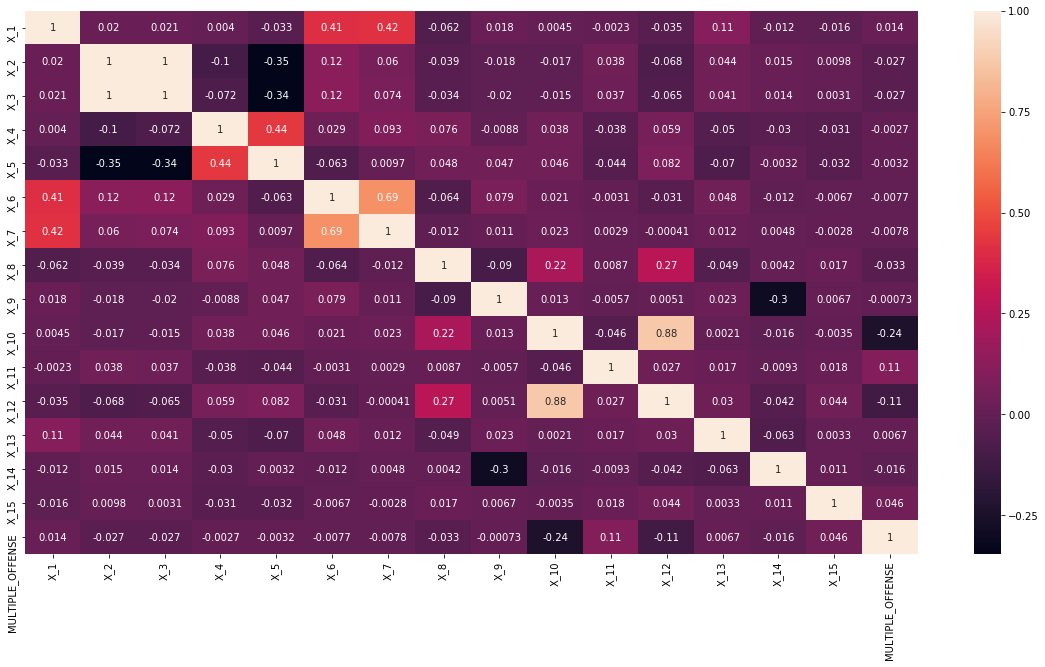

In [28]:
# Let's see the correlation matrix 

plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(train.corr(),annot = True)
plt.show()

#### Dropping highly correlated variables

In [29]:
X_test = X_test.drop(['X_2','X_10'], 1)
X_train = X_train.drop(['X_2','X_10'], 1)

After dropping highly correlated variables now let's check the correlation matrix again.

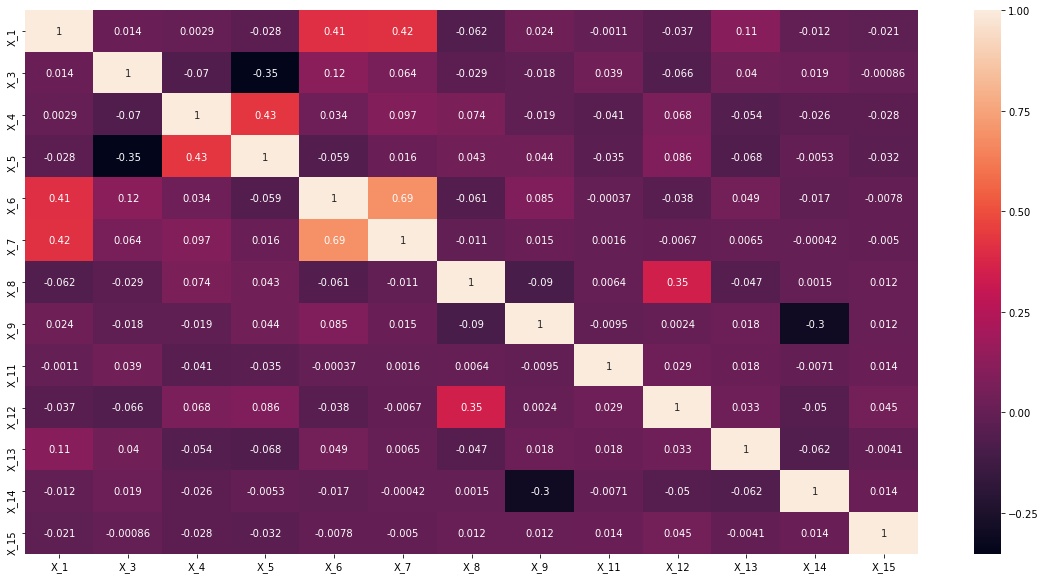

In [30]:
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(),annot = True)
plt.show()

### Step 7: Model Building

Running our First Training Model

In [31]:
import statsmodels.api as sm


In [32]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       MULTIPLE_OFFENSE   No. Observations:                16571
Model:                            GLM   Df Residuals:                    16557
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2876.9
Date:                Sun, 21 Jun 2020   Deviance:                       5753.7
Time:                        02:22:24   Pearson chi2:                 4.24e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2179      0.042     75.871      0.000       3.135       3.301
X_1            0.1342      0.055      2.426      0.015       0.026       0.243
X_3           -0.1688      0.040     -4.256      0.000      -0.247      -0.091
X_4            0.0324      0.042      0.767      0.443      -0.050       0.115
X_5           -0.0358      0.044     -0.806      0.420      -0.123       0.051
X_6           -0.0344      0.054     -0.639      0.523      -0.140       0.071
X_7           -0.0414      0.053     -0.777      0.437      -0.146       0.063
X_8            0.0319      0.043      0.747      0.455      -0.052       0.116
X_9           -0.0380      0.040     -0.946      0.344      -0.117       0.041
X_11           0.4094      0.034     12.219      0.000       0.344       0.475
X_12          -0.3701      0.034    -10.830      0.000      -0.437      -0.303
X_13           0.0023      0.039      0.059      0.953      -0.074       0.079
X_14          -0.1066      0.040     -2.693      0.007      -0.184      -0.029
X_15           0.2152      0.033      6.546      0.000       0.151       0.280
==============================================================================
"""

### Step 8: Feature Selection Using RFE

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [34]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 10)             # running RFE with 10 variables as output
rfe = rfe.fit(X_train, y_train)

In [35]:
rfe.support_

array([ True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True])

In [36]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('X_1', True, 1),
 ('X_3', True, 1),
 ('X_4', False, 2),
 ('X_5', True, 1),
 ('X_6', True, 1),
 ('X_7', True, 1),
 ('X_8', False, 3),
 ('X_9', True, 1),
 ('X_11', True, 1),
 ('X_12', True, 1),
 ('X_13', False, 4),
 ('X_14', True, 1),
 ('X_15', True, 1)]

In [37]:
col = X_train.columns[rfe.support_]


In [38]:
X_train.columns[~rfe.support_]


Index(['X_4', 'X_8', 'X_13'], dtype='object')

#### Assessing the model with StatsModels

In [39]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:       MULTIPLE_OFFENSE   No. Observations:                16571
Model:                            GLM   Df Residuals:                    16560
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2877.5
Date:                Sun, 21 Jun 2020   Deviance:                       5755.0
Time:                        02:22:24   Pearson chi2:                 3.17e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2168      0.042     75.938      0.000       3.134       3.300
X_1            0.1320      0.055      2.399      0.016       0.024       0.240
X_3           -0.1647      0.039     -4.187      0.000      -0.242      -0.088
X_5           -0.0205      0.040     -0.512      0.608      -0.099       0.058
X_6           -0.0360      0.054     -0.669      0.503      -0.141       0.069
X_7           -0.0374      0.053     -0.703      0.482      -0.141       0.067
X_9           -0.0427      0.040     -1.074      0.283      -0.121       0.035
X_11           0.4051      0.033     12.236      0.000       0.340       0.470
X_12          -0.3623      0.033    -10.950      0.000      -0.427      -0.297
X_14          -0.1085      0.039     -2.749      0.006      -0.186      -0.031
X_15           0.2164      0.033      6.586      0.000       0.152       0.281
==============================================================================
"""

In [40]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

19501    0.972079
307      0.974905
21486    0.964269
13512    0.975226
16695    0.959683
12664    0.970364
2427     0.963205
18734    0.942371
11548    0.972991
1340     0.966039
dtype: float64

In [41]:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.97207948, 0.97490468, 0.96426922, 0.97522626, 0.95968334,
       0.97036362, 0.96320466, 0.94237147, 0.97299052, 0.96603904])

#### Creating a dataframe with the actual offense flag and the predicted probabilities

In [42]:
y_train_pred_final = pd.DataFrame({'Offense':y_train.values, 'Offense_Prob':y_train_pred})
y_train_pred_final['INCIDENT_ID'] = y_train.index
y_train_pred_final.head()

,Offense,Offense_Prob,INCIDENT_ID
0,1,0.972079,19501
1,1,0.974905,307
2,1,0.964269,21486
3,1,0.975226,13512
4,1,0.959683,16695


#### Creating new column 'predicted' with 1 if Offense_Prob > 0.5 else 0

In [43]:
y_train_pred_final['predicted'] = y_train_pred_final.Offense_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Offense,Offense_Prob,INCIDENT_ID,predicted
0,1,0.972079,19501,1
1,1,0.974905,307,1
2,1,0.964269,21486,1
3,1,0.975226,13512,1
4,1,0.959683,16695,1


In [44]:
from sklearn import metrics

In [45]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Offense, y_train_pred_final.predicted )
print(confusion)

[[    5   743]
 [   11 15812]]


In [46]:
# Predicted     not_offense    offense
# Actual
# not_offense        8          745
# offense            11        15807

In [47]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Offense, y_train_pred_final.predicted))

0.9544988232454288


High Accuracy but 

Note:  Perfect example of how Accuracy is not always the best model evaluation metric. Although the model does a decent job of predicting offenses, the performance of not_offense class is terrible. Rightly so, since the response is highly imbalanced and seems like the model is biased towards the majority class.

#### Metrics beyond simply accuracy

In [48]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [49]:
# Let's see the sensitivity of our logistic regression model

TP / float(TP+FN)

0.9993048094545914

In [50]:
# Let us calculate specificity

TN / float(TN+FP)

0.0066844919786096255

In [51]:
# Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.9933155080213903


In [52]:
# positive predictive value 

print (TP / float(TP+FP))

0.9551192993053458


In [53]:
# Negative predictive value

print (TN / float(TN+ FN))

0.3125


Let's have a look at the ROC and AUC

In [54]:

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [55]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Offense, y_train_pred_final.Offense_Prob, drop_intermediate = False )

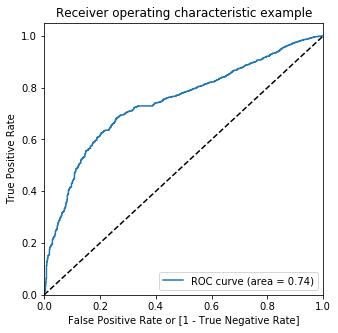

In [56]:
draw_roc(y_train_pred_final.Offense, y_train_pred_final.Offense_Prob)

In [57]:
# AUC:

metrics.auc(fpr, tpr)

0.7439808733039734

#### Checking VIFs

In [58]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [59]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,X_6,2.04
4,X_7,2.03
0,X_1,1.26
1,X_3,1.16
2,X_5,1.16
5,X_9,1.11
8,X_14,1.10
7,X_12,1.02
6,X_11,1.00
9,X_15,1.00


VIF's look in a reasonable range.

At this point, I decided to apply some oversampling techniques to my dataset and see if my baseline performance improves. If it does, I can move further with finding my Optimal Cutoff Point for the model.b

Sidenote: I will try tree based methods after logistic and hope it will give better results. I plan to use sklearn and H2O libraries for that approach.

### SMOTE

In [60]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 

Before OverSampling, counts of label '1': 15823
Before OverSampling, counts of label '0': 748 



In [61]:
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state = 2) 
X_train_res, y_train_res = smote.fit_sample(X_train, y_train.ravel()) 

Using TensorFlow backend.


In [62]:
type(y_train)

pandas.core.series.Series

In [63]:
type(pd.Series(y_train_res))

pandas.core.series.Series

In [64]:
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0))) 

After OverSampling, the shape of train_X: (31646, 13)
After OverSampling, the shape of train_y: (31646,) 

After OverSampling, counts of label '1': 15823
After OverSampling, counts of label '0': 15823


### Model Building after oversampling

In [65]:
# Logistic regression model
logm1 = sm.GLM(y_train_res,(sm.add_constant(X_train_res)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31646
Model:                            GLM   Df Residuals:                    31632
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19108.
Date:                Sun, 21 Jun 2020   Deviance:                       38216.
Time:                        02:22:28   Pearson chi2:                 8.42e+15
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3145      0.013     24.278      0.000       0.289       0.340
X_1            0.0780      0.016      4.970      0.000       0.047       0.109
X_3           -0.2047      0.013    -15.467      0.000      -0.231      -0.179
X_4            0.0916      0.015      6.132      0.000       0.062       0.121
X_5           -0.0858      0.015     -5.622      0.000      -0.116      -0.056
X_6           -0.0052      0.018     -0.283      0.777      -0.041       0.031
X_7           -0.0514      0.019     -2.745      0.006      -0.088      -0.015
X_8            0.0794      0.015      5.312      0.000       0.050       0.109
X_9           -0.0755      0.014     -5.312      0.000      -0.103      -0.048
X_11           0.6498      0.015     43.706      0.000       0.621       0.679
X_12          -0.9241      0.021    -44.400      0.000      -0.965      -0.883
X_13           0.0123      0.013      0.941      0.346      -0.013       0.038
X_14          -0.1469      0.014    -10.820      0.000      -0.174      -0.120
X_15           0.2401      0.012     20.196      0.000       0.217       0.263
==============================================================================
"""

In [66]:
logreg2 = LogisticRegression()

In [67]:
rfe2 = RFE(logreg2, 10)             # running RFE with 10 variables as output
rfe2 = rfe.fit(X_train_res, y_train_res)

In [68]:
rfe2.support_

array([ True,  True,  True,  True, False, False,  True,  True,  True,
        True, False,  True,  True])

In [69]:
list(zip(X_train_res.columns, rfe.support_, rfe.ranking_))

[('X_1', True, 1),
 ('X_3', True, 1),
 ('X_4', True, 1),
 ('X_5', True, 1),
 ('X_6', False, 4),
 ('X_7', False, 2),
 ('X_8', True, 1),
 ('X_9', True, 1),
 ('X_11', True, 1),
 ('X_12', True, 1),
 ('X_13', False, 3),
 ('X_14', True, 1),
 ('X_15', True, 1)]

In [70]:
X_train_res.columns[~rfe.support_]

Index(['X_6', 'X_7', 'X_13'], dtype='object')

In [71]:
X_train_res_sm = sm.add_constant(X_train_res[col])
logm3 = sm.GLM(y_train_res,X_train_res_sm, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                31646
Model:                            GLM   Df Residuals:                    31635
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -19142.
Date:                Sun, 21 Jun 2020   Deviance:                       38283.
Time:                        02:22:28   Pearson chi2:                 9.25e+15
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3081      0.013     23.898      0.000       0.283       0.333
X_1            0.0766      0.016      4.920      0.000       0.046       0.107
X_3           -0.1961      0.013    -15.023      0.000      -0.222      -0.171
X_5           -0.0372      0.013     -2.781      0.005      -0.063      -0.011
X_6           -0.0099      0.018     -0.539      0.590      -0.046       0.026
X_7           -0.0373      0.019     -2.008      0.045      -0.074      -0.001
X_9           -0.0925      0.014     -6.585      0.000      -0.120      -0.065
X_11           0.6429      0.015     43.343      0.000       0.614       0.672
X_12          -0.8892      0.020    -44.548      0.000      -0.928      -0.850
X_14          -0.1499      0.014    -11.098      0.000      -0.176      -0.123
X_15           0.2363      0.012     19.959      0.000       0.213       0.260
==============================================================================
"""

In [72]:
# Getting the predicted values on the train set
y_train_res_pred = res.predict(X_train_res_sm)
y_train_res_pred[:10]

0    0.972079
1    0.974905
2    0.964269
3    0.975226
4    0.959683
5    0.970364
6    0.963205
7    0.942371
8    0.972991
9    0.966039
dtype: float64

In [73]:
y_train_res_pred = y_train_res_pred.values.reshape(-1)
y_train_res_pred[:10]

array([0.97207948, 0.97490468, 0.96426922, 0.97522626, 0.95968334,
       0.97036362, 0.96320466, 0.94237147, 0.97299052, 0.96603904])

In [74]:
y_train_res_pred_final = pd.DataFrame({'Offense':pd.Series(y_train_res).values, 'Offense_Prob':y_train_res_pred})
y_train_res_pred_final['INCIDENT_ID'] = pd.Series(y_train_res).index
y_train_res_pred_final.head()

,Offense,Offense_Prob,INCIDENT_ID
0,1,0.972079,0
1,1,0.974905,1
2,1,0.964269,2
3,1,0.975226,3
4,1,0.959683,4


In [75]:
y_train_res_pred_final['predicted'] = y_train_res_pred_final.Offense_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_res_pred_final.head()

,Offense,Offense_Prob,INCIDENT_ID,predicted
0,1,0.972079,0,1
1,1,0.974905,1,1
2,1,0.964269,2,1
3,1,0.975226,3,1
4,1,0.959683,4,1


In [76]:
# Confusion matrix 
confusion_res = metrics.confusion_matrix(y_train_res_pred_final.Offense, y_train_res_pred_final.predicted )
print(confusion_res)

[[   76 15747]
 [   11 15812]]


In [77]:
fpr_res, tpr_res, thresholds = metrics.roc_curve( y_train_res_pred_final.Offense, y_train_res_pred_final.Offense_Prob, drop_intermediate = False )

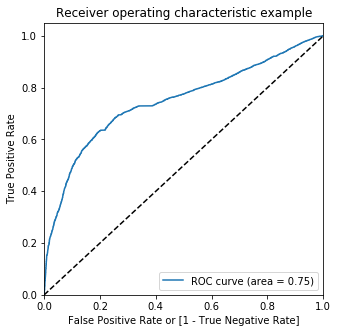

In [78]:
draw_roc(y_train_res_pred_final.Offense, y_train_res_pred_final.Offense_Prob)

In [79]:
# AUC:

metrics.auc(fpr_res, tpr_res)

0.747352071643501

Not a significant imporovement in the AUC is noted after applying SMOTE for handling imbalance. Looks like imbalance in response is making it difficult for Logistic regression to perform well. Regardless, I will try to find an optimal cutoff point and see the best performance possible with this approach and move on to tree based methods.

### Step 10: Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity



In [80]:
numbers = [float(x)/20 for x in range(16,21)]
print(numbers)

[0.8, 0.85, 0.9, 0.95, 1.0]


In [81]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/20 for x in range(16,21)]
print(numbers)
for i in numbers:
    y_train_res_pred_final[i]= y_train_res_pred_final.Offense_Prob.map(lambda x: 1 if x > i else 0)
y_train_res_pred_final.head()

[0.8, 0.85, 0.9, 0.95, 1.0]


,Offense,Offense_Prob,INCIDENT_ID,predicted,0.8,0.85,0.9,0.95,1.0
0,1,0.972079,0,1,1,1,1,1,0
1,1,0.974905,1,1,1,1,1,1,0
2,1,0.964269,2,1,1,1,1,1,0
3,1,0.975226,3,1,1,1,1,1,0
4,1,0.959683,4,1,1,1,1,1,0


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.8, 0.85, 0.9, 0.95, 1.0]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_res_pred_final.Offense, y_train_res_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.80  0.80  0.509764  0.996524  0.023004
0.85  0.85  0.513398  0.990141  0.036656
0.90  0.90  0.534254  0.949630  0.118878
0.95  0.95  0.653637  0.762055  0.545219
1.00  1.00  0.500000  0.000000  1.000000


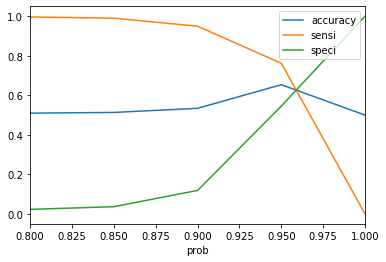

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, looks like 0.96 is the optimum point to take it as a cutoff probability

In [84]:
y_train_res_pred_final['final_predicted'] = y_train_res_pred_final.Offense_Prob.map( lambda x: 1 if x > 0.96 else 0)

y_train_res_pred_final.head()

,Offense,Offense_Prob,INCIDENT_ID,predicted,0.8,0.85,0.9,0.95,1.0,final_predicted
0,1,0.972079,0,1,1,1,1,1,0,1
1,1,0.974905,1,1,1,1,1,1,0,1
2,1,0.964269,2,1,1,1,1,1,0,1
3,1,0.975226,3,1,1,1,1,1,0,1
4,1,0.959683,4,1,1,1,1,1,0,0


In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_res_pred_final.Offense, y_train_res_pred_final.final_predicted)

0.7120647159198635

In [86]:
confusion2 = metrics.confusion_matrix(y_train_res_pred_final.Offense, y_train_res_pred_final.final_predicted )
confusion2

array([[12234,  3589],
       [ 5523, 10300]], dtype=int64)

In [87]:
fpr_res, tpr_res, thresholds = metrics.roc_curve( y_train_res_pred_final.Offense, y_train_res_pred_final.final_predicted, drop_intermediate = False )

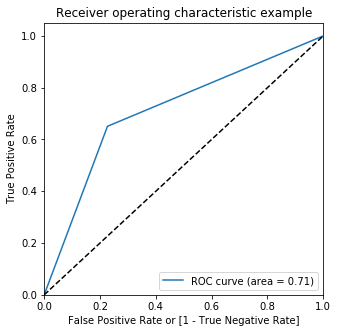

In [88]:
draw_roc(y_train_res_pred_final.Offense, y_train_res_pred_final.final_predicted)

In [89]:
# AUC:

metrics.auc(fpr_res, tpr_res)

0.7120647159198634

### H2O Tree based approach

### Random Forest

In [91]:
# Initiate h2o cluster

import h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.241-b07, mixed mode)
  Starting server from C:\Users\anish\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\anish\AppData\Local\Temp\tmp53p1dc1m
  JVM stdout: C:\Users\anish\AppData\Local\Temp\tmp53p1dc1m\h2o_anish_started_from_python.out
  JVM stderr: C:\Users\anish\AppData\Local\Temp\tmp53p1dc1m\h2o_anish_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,America/Chicago
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.5
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_anish_kdrrrj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.493 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"accepting new members, healthy"


In [92]:
data = h2o.import_file("Dataset/Train.csv")
y = "MULTIPLE_OFFENSE"
x = data.names
x.remove(y)
x.remove("INCIDENT_ID")
x.remove("DATE")
data[y] = data[y].asfactor()
train, valid, test = data.split_frame([0.75, 0.15])

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [93]:
# Build a baseline Random Forest model. Using 100 trees, balance_classes = True to handle class imbalance in response

from h2o.estimators.random_forest import H2ORandomForestEstimator
m = H2ORandomForestEstimator(
  ntrees=100,
  stopping_metric="misclassification",
  balance_classes=True,
  stopping_rounds=3,
  stopping_tolerance=0.02,  #2%
  max_runtime_secs=60,
  model_id="RF:baseline"
  )
m.train(x, y, train, validation_frame=valid)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [94]:
m

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  RF:baseline


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,17.0,17.0,92352.0,20.0,20.0,20.0,295.0,521.0,428.35294




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.016155326037207113
RMSE: 0.12710360355712624
LogLoss: 0.06019330814460092
Mean Per-Class Error: 0.0008200202377124377
AUC: 0.9998196911775858
AUCPR: 0.9998865365350421
Gini: 0.9996393823551717

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.8254457702138827: 


,,0,1,Error,Rate
0,0,17056.0,19.0,0.0011,(19.0/17075.0)
1,1,9.0,17059.0,0.0005,(9.0/17068.0)
2,Total,17065.0,17078.0,0.0008,(28.0/34143.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.825446,0.999180,51.0
1,max f2,0.825446,0.999356,51.0
2,max f0point5,0.915196,0.999472,37.0
3,max accuracy,0.825446,0.999180,51.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.825446,0.998360,51.0
8,max min_per_class_accuracy,0.856882,0.999063,46.0
9,max mean_per_class_accuracy,0.825446,0.999180,51.0



Gains/Lift Table: Avg response rate: 49.99 %, avg score: 54.15 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.459235,1.000000,2.000293,2.000293,1.000000,1.000000,1.000000,1.000000,0.918604,0.918604,100.029279,100.029279
1,,2,0.500015,0.811227,1.970138,1.997833,0.984925,0.983001,0.998770,0.998614,0.080342,0.998946,97.013762,99.783342
2,,3,0.600047,0.178333,0.002927,1.665268,0.001463,0.356374,0.832512,0.891548,0.000293,0.999239,-99.707303,66.526790
3,,4,1.000000,0.000000,0.001903,1.000000,0.000952,0.016433,0.499927,0.541543,0.000761,1.000000,-99.809663,0.000000




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.02665666419175522
RMSE: 0.1632686871134671
LogLoss: 0.08158391169936507
Mean Per-Class Error: 0.010990500124952063
AUC: 0.9987346405780879
AUCPR: 0.9999382929391128
Gini: 0.9974692811561758

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9688542525823712: 


,,0,1,Error,Rate
0,0,158.0,8.0,0.0482,(8.0/166.0)
1,1,17.0,3406.0,0.005,(17.0/3423.0)
2,Total,175.0,3414.0,0.007,(25.0/3589.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.968854,0.996343,160.0
1,max f2,0.941260,0.997841,181.0
2,max f0point5,0.978484,0.997652,152.0
3,max accuracy,0.968854,0.993034,160.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.888460,1.000000,208.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.968854,0.923387,160.0
8,max min_per_class_accuracy,0.983561,0.987952,138.0
9,max mean_per_class_accuracy,0.981077,0.989009,145.0



Gains/Lift Table: Avg response rate: 95.37 %, avg score: 98.42 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.804402,1.000000,1.048495,1.048495,1.000000,1.000000,1.000000,1.000000,0.843412,0.843412,4.849547,4.849547
1,,2,0.899972,0.996902,1.048495,1.048495,1.000000,0.997588,1.000000,0.999744,0.100204,0.943617,4.849547,4.849547
2,,3,1.000000,0.000000,0.563676,1.000000,0.537604,0.844431,0.953748,0.984208,0.056383,1.000000,-43.632416,0.000000




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-21 02:23:23,0.020 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-21 02:23:23,0.463 sec,1.0,0.151403,0.271282,0.992813,0.995480,2.000293,0.014309,0.158431,0.814205,0.882390,0.989012,1.037268,0.025077
2,,2020-06-21 02:23:23,0.627 sec,2.0,0.154769,0.230777,0.994117,0.996340,2.000293,0.009815,0.143908,0.305344,0.944410,0.994889,1.043396,0.020897
3,,2020-06-21 02:23:23,0.687 sec,3.0,0.164858,0.188248,0.995775,0.997354,2.000293,0.009052,0.150076,0.177995,0.961088,0.996402,1.044890,0.014210
4,,2020-06-21 02:23:23,0.747 sec,4.0,0.167630,0.171591,0.996406,0.997755,2.000293,0.007529,0.154912,0.146014,0.970862,0.997314,1.045816,0.013096
5,,2020-06-21 02:23:24,0.830 sec,5.0,0.170041,0.146719,0.997322,0.998317,2.000293,0.006098,0.153193,0.092211,0.990383,0.999211,1.047819,0.011424
6,,2020-06-21 02:23:24,0.899 sec,6.0,0.162436,0.129863,0.997808,0.998636,2.000293,0.004664,0.156670,0.094458,0.990979,0.999238,1.047814,0.010309
7,,2020-06-21 02:23:24,1.029 sec,7.0,0.155156,0.113825,0.998197,0.998872,2.000293,0.003689,0.157668,0.086579,0.994380,0.999563,1.048150,0.010309
8,,2020-06-21 02:23:24,1.105 sec,8.0,0.148198,0.102355,0.998473,0.999049,2.000293,0.002702,0.158879,0.087448,0.994737,0.999579,1.048148,0.008638
9,,2020-06-21 02:23:24,1.145 sec,9.0,0.149030,0.095377,0.998774,0.999227,2.000293,0.002798,0.158972,0.079629,0.997416,0.999872,1.048495,0.007802



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,X_10,42533.476562,1.000000,0.421476
1,X_11,23861.007812,0.560994,0.236445
2,X_15,11641.275391,0.273697,0.115357
3,X_12,6192.371094,0.145588,0.061362
4,X_2,3077.527588,0.072355,0.030496
5,X_3,2472.604736,0.058133,0.024502
6,X_13,1792.118896,0.042134,0.017759
7,X_6,1727.717163,0.040620,0.017120
8,X_7,1546.445923,0.036358,0.015324
9,X_8,1445.217041,0.033978,0.014321


In [95]:
m.model_performance(test)


ModelMetricsBinomial: drf
** Reported on test data. **

MSE: 0.026297221807469715
RMSE: 0.16216418164153795
LogLoss: 0.08218657433862499
Mean Per-Class Error: 0.013497892294621283
AUC: 0.9982782988039998
AUCPR: 0.99992009058504
Gini: 0.9965565976079995

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9695116705497882: 


,,0,1,Error,Rate
0,0,103.0,4.0,0.0374,(4.0/107.0)
1,1,10.0,2278.0,0.0044,(10.0/2288.0)
2,Total,113.0,2282.0,0.0058,(14.0/2395.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.969512,0.996937,122.0
1,max f2,0.954170,0.997293,132.0
2,max f0point5,0.969512,0.997722,122.0
3,max accuracy,0.969512,0.994154,122.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.472142,1.000000,182.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.969512,0.933684,122.0
8,max min_per_class_accuracy,0.985947,0.981308,103.0
9,max mean_per_class_accuracy,0.981077,0.986502,115.0



Gains/Lift Table: Avg response rate: 95.53 %, avg score: 98.48 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.787891,1.000000,1.046766,1.046766,1.000000,1.000000,1.000000,1.000000,0.824738,0.824738,4.676573,4.676573
1,,2,0.802505,0.998453,1.046766,1.046766,1.000000,0.998516,1.000000,0.999973,0.015297,0.840035,4.676573,4.676573
2,,3,0.899791,0.994880,1.046766,1.046766,1.000000,0.997420,1.000000,0.999697,0.101836,0.941871,4.676573,4.676573
3,,4,1.000000,0.000000,0.580083,1.000000,0.554167,0.850967,0.955324,0.984793,0.058129,1.000000,-41.991732,0.000000


#### AUC on test is 0.9963. Significant improvement observed as compared to logistic regression model.

Let's do some grid search CV and find a better Random Forest Model

#### Cartesian Grid Search

In [96]:
from h2o.estimators import H2ORandomForestEstimator
from h2o.grid.grid_search import H2OGridSearch

In [97]:
rf_params1 = {"ntrees": [50, 100, 120, 150],
                'max_depth': [5, 10, 20, 30, 40],
                "min_rows": [1, 2, 3, 5]}              

In [98]:
rf_grid1 = H2OGridSearch(model=H2ORandomForestEstimator(nfolds=10,
                                balance_classes=True,
                                stopping_rounds=3,
                                stopping_tolerance=0.02,  #2%
                                max_runtime_secs=600),
                          grid_id='rf_grid1',
                          hyper_params=rf_params1)

In [99]:
rf_grid1.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                seed=1)

drf Grid Build progress: |████████████████████████████████████████████████| 100%


In [100]:
rf_grid1

      max_depth min_rows ntrees          model_ids              logloss
0            20      5.0     10  rf_grid1_model_18  0.06994851134976451
1            20      5.0     10  rf_grid1_model_38  0.06994851134976451
2            20      5.0     10  rf_grid1_model_58  0.06994851134976451
3            20      5.0     10  rf_grid1_model_78  0.06994851134976451
4            30      5.0     10  rf_grid1_model_19  0.07004283042410435
.. ..       ...      ...    ...                ...                  ...
75            5      3.0      7  rf_grid1_model_71  0.12348522759400977
76            5      2.0      7  rf_grid1_model_26  0.12348946979475194
77            5      2.0      7  rf_grid1_model_46  0.12348946979475194
78            5      2.0      7   rf_grid1_model_6  0.12348946979475194
79            5      2.0      7  rf_grid1_model_66  0.12348946979475194

[80 rows x 6 columns]


In [101]:
rf_pridperf1 = rf_grid1.get_grid(sort_by='auc', decreasing=True)

In [102]:
rf_pridperf1

      max_depth min_rows ntrees          model_ids                 auc
0            40      2.0     11  rf_grid1_model_10  0.9970784566979825
1            30      2.0     11  rf_grid1_model_29  0.9970784566979825
2            40      2.0     11  rf_grid1_model_30  0.9970784566979825
3            30      2.0     11  rf_grid1_model_49  0.9970784566979825
4            40      2.0     11  rf_grid1_model_50  0.9970784566979825
.. ..       ...      ...    ...                ...                 ...
75            5      3.0      7  rf_grid1_model_71  0.9611182866505871
76            5      2.0      7  rf_grid1_model_26  0.9610740548820124
77            5      2.0      7  rf_grid1_model_46  0.9610740548820124
78            5      2.0      7   rf_grid1_model_6  0.9610740548820124
79            5      2.0      7  rf_grid1_model_66  0.9610740548820124

[80 rows x 6 columns]


In [103]:
best_rf1 = rf_pridperf1.models[0]

In [104]:
best_rf_perf1 = best_rf1.model_performance(test)

In [105]:
best_rf_perf1.auc()

0.9966607574668322

#### best_rf1 gives the best AUC of 0.999

In [106]:
best_rf1

Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  rf_grid1_model_10


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,11.0,11.0,64555.0,19.0,25.0,21.818182,342.0,595.0,463.27274




ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.035686093139209715
RMSE: 0.18890763123603482
LogLoss: 0.12432665033344685
Mean Per-Class Error: 0.002210713024371369
AUC: 0.9991577311327889
AUCPR: 0.999482990528828
Gini: 0.9983154622655779

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9111036715879749: 


,,0,1,Error,Rate
0,0,16962.0,8.0,0.0005,(8.0/16970.0)
1,1,67.0,16895.0,0.004,(67.0/16962.0)
2,Total,17029.0,16903.0,0.0022,(75.0/33932.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.911104,0.997785,52.0
1,max f2,0.859920,0.997477,68.0
2,max f0point5,0.914940,0.998888,51.0
3,max accuracy,0.911104,0.997790,52.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,399.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.911104,0.995585,52.0
8,max min_per_class_accuracy,0.877288,0.997054,63.0
9,max mean_per_class_accuracy,0.911104,0.997789,52.0



Gains/Lift Table: Avg response rate: 50.02 %, avg score: 56.84 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.446914,1.000000,1.999356,1.999356,1.000000,1.000000,1.000000,1.000000,0.893541,0.893541,99.935586,99.935586
1,,2,0.500015,0.807190,1.843863,1.982843,0.922228,0.972712,0.991741,0.997102,0.097909,0.991450,84.386266,98.284290
2,,3,0.600357,0.327902,0.005836,1.652409,0.002919,0.507403,0.826471,0.915255,0.000586,0.992036,-99.416417,65.240939
3,,4,1.000000,0.000000,0.019928,1.000000,0.009967,0.047311,0.500161,0.568387,0.007964,1.000000,-98.007238,0.000000




ModelMetricsBinomial: drf
** Reported on validation data. **

MSE: 0.02616075874586331
RMSE: 0.16174287850122895
LogLoss: 0.0885432647619736
Mean Per-Class Error: 0.01338306776624465
AUC: 0.998028925518023
AUCPR: 0.9999049038238325
Gini: 0.996057851036046

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9506403923972656: 


,,0,1,Error,Rate
0,0,147.0,19.0,0.1145,(19.0/166.0)
1,1,8.0,3415.0,0.0023,(8.0/3423.0)
2,Total,155.0,3434.0,0.0075,(27.0/3589.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.950640,0.996062,179.0
1,max f2,0.948270,0.997315,182.0
2,max f0point5,0.974889,0.997065,155.0
3,max accuracy,0.950640,0.992477,179.0
4,max precision,1.000000,1.000000,0.0
5,max recall,0.000000,1.000000,263.0
6,max specificity,1.000000,1.000000,0.0
7,max absolute_mcc,0.965798,0.913833,162.0
8,max min_per_class_accuracy,0.983283,0.983348,134.0
9,max mean_per_class_accuracy,0.983892,0.986617,125.0



Gains/Lift Table: Avg response rate: 95.37 %, avg score: 98.32 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.741432,1.000000,1.048495,1.048495,1.000000,1.000000,1.000000,1.000000,0.777388,0.777388,4.849547,4.849547
1,,2,0.834773,0.996743,1.048495,1.048495,1.000000,0.997751,1.000000,0.999749,0.097867,0.875256,4.849547,4.849547
2,,3,0.904709,0.995363,1.044318,1.048173,0.996016,0.995733,0.999692,0.999438,0.073035,0.948291,4.431820,4.817256
3,,4,1.000000,0.000000,0.542642,1.000000,0.517544,0.828740,0.953748,0.983172,0.051709,1.000000,-45.735761,0.000000




ModelMetricsBinomial: drf
** Reported on cross-validation data. **

MSE: 0.024892011867535483
RMSE: 0.1577720249839479
LogLoss: 0.07912241331598428
Mean Per-Class Error: 0.017299409297805046
AUC: 0.9970784566979825
AUCPR: 0.9998284022881352
Gini: 0.9941569133959649

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.96449371947639: 


,,0,1,Error,Rate
0,0,731.0,64.0,0.0805,(64.0/795.0)
1,1,109.0,16968.0,0.0064,(109.0/17077.0)
2,Total,840.0,17032.0,0.0097,(173.0/17872.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.964494,0.994928,101.0
1,max f2,0.919324,0.996447,153.0
2,max f0point5,0.976717,0.996120,79.0
3,max accuracy,0.964494,0.990320,101.0
4,max precision,0.996340,0.999934,18.0
5,max recall,0.675443,1.000000,294.0
6,max specificity,1.000000,0.998742,0.0
7,max absolute_mcc,0.965478,0.889591,99.0
8,max min_per_class_accuracy,0.985316,0.980793,61.0
9,max mean_per_class_accuracy,0.987137,0.982701,55.0



Gains/Lift Table: Avg response rate: 95.55 %, avg score: 98.36 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.786873,1.000000,1.046479,1.046479,0.999929,1.000000,0.999929,1.000000,0.823447,0.823447,4.647943,4.647943
1,,2,0.799966,0.998968,1.046554,1.046481,1.000000,0.999286,0.999930,0.999988,0.013703,0.837149,4.655384,4.648064
2,,3,0.899955,0.994531,1.045383,1.046359,0.998881,0.996480,0.999813,0.999599,0.104527,0.941676,4.538255,4.635864
3,,4,1.000000,0.000000,0.582980,1.000000,0.557047,0.840073,0.955517,0.983639,0.058324,1.000000,-41.702034,0.000000




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.99144286,0.0022332128,0.9920182,0.99154454,0.98966265,0.9961707,0.99321264,0.9895547,0.9894853,0.98944443,0.9901848,0.9931507
1,auc,0.9972885,0.0026225192,0.9981861,0.9967818,0.99005497,0.99923897,0.998449,0.9978935,0.99809444,0.9981514,0.997499,0.9985359
2,aucpr,0.9998341,2.4455125E-4,0.9999203,0.9998419,0.99914485,0.9999714,0.99994487,0.9998985,0.99989325,0.9999053,0.99990016,0.9999205
3,err,0.008557128,0.0022332128,0.007981756,0.008455467,0.010337323,0.0038293216,0.0067873304,0.0104453,0.010514665,0.010555555,0.009815242,0.006849315
4,err_count,15.3,4.0838437,14.0,15.0,19.0,7.0,12.0,19.0,19.0,19.0,17.0,12.0
5,f0point5,0.9952367,0.001808507,0.99512833,0.997151,0.9937322,0.99683183,0.9978831,0.99299735,0.99289954,0.9942784,0.99471724,0.9967478
6,f1,0.99552083,0.0011784291,0.9958383,0.9955556,0.99458224,0.99801755,0.9964768,0.99453866,0.99446225,0.99445254,0.9948964,0.9963877
7,f2,0.9958074,0.0014250197,0.99654925,0.9939652,0.9954338,0.99920607,0.99507445,0.99608475,0.9960299,0.9946268,0.99507564,0.99602795
8,lift_top_group,1.0464947,0.0069212997,1.0440476,1.0484633,1.048927,1.0374575,1.0357352,1.048415,1.0561075,1.0514019,1.0402403,1.0541517
9,logloss,0.07902506,0.017436981,0.06337239,0.08470113,0.10928159,0.058372606,0.055608034,0.075323805,0.094648816,0.08361619,0.07118428,0.09414177



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-06-21 02:23:51,26.007 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2020-06-21 02:23:51,26.037 sec,1.0,0.288523,0.399512,0.987946,0.991164,1.999356,0.035508,0.178976,0.829291,0.863957,0.987499,1.035939,0.034550
2,,2020-06-21 02:23:51,26.054 sec,2.0,0.242753,0.293814,0.993172,0.995312,1.999356,0.018407,0.150889,0.206792,0.965633,0.997044,1.045777,0.021454
3,,2020-06-21 02:23:51,26.070 sec,3.0,0.220142,0.243601,0.994859,0.996611,1.999356,0.012240,0.149917,0.127593,0.984496,0.998754,1.047458,0.015325
4,,2020-06-21 02:23:51,26.087 sec,4.0,0.207654,0.209686,0.995957,0.997391,1.999356,0.008998,0.153286,0.111646,0.992397,0.999465,1.048145,0.012260
5,,2020-06-21 02:23:51,26.106 sec,5.0,0.201667,0.187716,0.996658,0.997884,1.999356,0.007198,0.156349,0.095795,0.992887,0.999484,1.048138,0.010867
6,,2020-06-21 02:23:51,26.125 sec,6.0,0.196738,0.163139,0.997488,0.998408,1.999356,0.005825,0.158431,0.097752,0.993155,0.999496,1.048134,0.010309
7,,2020-06-21 02:23:51,26.141 sec,7.0,0.189055,0.143162,0.998106,0.998808,1.999356,0.004487,0.159150,0.096834,0.993742,0.999523,1.048132,0.009473
8,,2020-06-21 02:23:51,26.161 sec,8.0,0.183567,0.130630,0.998507,0.999069,1.999356,0.003575,0.159159,0.087232,0.997516,0.999880,1.048495,0.007523
9,,2020-06-21 02:23:51,26.184 sec,9.0,0.181730,0.125332,0.998711,0.999201,1.999356,0.002946,0.158968,0.086724,0.997695,0.999889,1.048495,0.007244



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,X_11,24063.298828,1.000000,0.400327
1,X_10,13074.392578,0.543333,0.217511
2,X_15,5742.733887,0.238651,0.095538
3,X_12,4272.977539,0.177572,0.071087
4,X_3,2379.115723,0.098869,0.039580
5,X_2,2154.993164,0.089555,0.035851
6,X_7,1292.207153,0.053700,0.021498
7,X_9,1222.821289,0.050817,0.020343
8,X_13,1147.223877,0.047675,0.019086
9,X_14,1127.066528,0.046838,0.018750


## Gradient Boosting Machines

In [107]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
gbm1 = H2OGradientBoostingEstimator(model_id="GBM_defaults", nfolds=10)
gbm1.train(x, y, train)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [108]:
gbm1

Model Details
H2OGradientBoostingEstimator :  Gradient Boosting Machine
Model Key:  GBM_defaults


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,50.0,50.0,17861.0,5.0,5.0,5.0,16.0,29.0,23.88




ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.001293254469120907
RMSE: 0.035961847409732815
LogLoss: 0.008121549600177129
Mean Per-Class Error: 0.0032629123802179194
AUC: 0.9999029552787725
AUCPR: 0.9999954270553528
Gini: 0.999805910557545

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5756488318414907: 


,,0,1,Error,Rate
0,0,789.0,6.0,0.0075,(6.0/795.0)
1,1,9.0,17068.0,0.0005,(9.0/17077.0)
2,Total,798.0,17074.0,0.0008,(15.0/17872.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.575649,0.999561,187.0
1,max f2,0.318792,0.999602,198.0
2,max f0point5,0.575649,0.999613,187.0
3,max accuracy,0.575649,0.999161,187.0
4,max precision,0.999600,1.000000,0.0
5,max recall,0.209296,1.000000,219.0
6,max specificity,0.999600,1.000000,0.0
7,max absolute_mcc,0.575649,0.990147,187.0
8,max min_per_class_accuracy,0.908097,0.996226,149.0
9,max mean_per_class_accuracy,0.863464,0.996737,160.0



Gains/Lift Table: Avg response rate: 95.55 %, avg score: 95.55 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.012030,0.999602,1.046554,1.046554,1.000000,0.999604,1.000000,0.999604,0.012590,0.012590,4.655384,4.655384
1,,2,0.110956,0.999602,1.046554,1.046554,1.000000,0.999602,1.000000,0.999602,0.103531,0.116121,4.655384,4.655384
2,,3,0.152529,0.999596,1.046554,1.046554,1.000000,0.999596,1.000000,0.999601,0.043509,0.159630,4.655384,4.655384
3,,4,0.257386,0.999385,1.046554,1.046554,1.000000,0.999422,1.000000,0.999528,0.109738,0.269368,4.655384,4.655384
4,,5,0.457475,0.999332,1.046554,1.046554,1.000000,0.999338,1.000000,0.999445,0.209404,0.478773,4.655384,4.655384
5,,6,0.509344,0.999311,1.046554,1.046554,1.000000,0.999311,1.000000,0.999431,0.054284,0.533056,4.655384,4.655384
6,,7,0.680394,0.999297,1.046554,1.046554,1.000000,0.999298,1.000000,0.999398,0.179013,0.712069,4.655384,4.655384
7,,8,0.709937,0.999277,1.046554,1.046554,1.000000,0.999280,1.000000,0.999393,0.030919,0.742988,4.655384,4.655384
8,,9,0.800022,0.999216,1.046554,1.046554,1.000000,0.999251,1.000000,0.999377,0.094279,0.837266,4.655384,4.655384
9,,10,0.900067,0.990442,1.046554,1.046554,1.000000,0.995528,1.000000,0.998949,0.104702,0.941969,4.655384,4.655384




ModelMetricsBinomial: gbm
** Reported on cross-validation data. **

MSE: 0.0019795543503767546
RMSE: 0.04449218302552432
LogLoss: 0.010153774011791832
Mean Per-Class Error: 0.006129985419352835
AUC: 0.9996108267289521
AUCPR: 0.9999814974394502
Gini: 0.9992216534579041

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5709182847992744: 


,,0,1,Error,Rate
0,0,778.0,17.0,0.0214,(17.0/795.0)
1,1,14.0,17063.0,0.0008,(14.0/17077.0)
2,Total,792.0,17080.0,0.0017,(31.0/17872.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.570918,0.999092,187.0
1,max f2,0.437069,0.999204,201.0
2,max f0point5,0.608273,0.999063,185.0
3,max accuracy,0.570918,0.998265,187.0
4,max precision,0.999599,1.000000,0.0
5,max recall,0.096910,1.000000,297.0
6,max specificity,0.999599,1.000000,0.0
7,max absolute_mcc,0.570918,0.979561,187.0
8,max min_per_class_accuracy,0.935827,0.993207,119.0
9,max mean_per_class_accuracy,0.885143,0.993870,141.0



Gains/Lift Table: Avg response rate: 95.55 %, avg score: 95.59 %


,,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain
0,,1,0.012254,0.999621,1.046554,1.046554,1.000000,0.999623,1.000000,0.999623,0.012824,0.012824,4.655384,4.655384
1,,2,0.020479,0.999617,1.046554,1.046554,1.000000,0.999617,1.000000,0.999620,0.008608,0.021432,4.655384,4.655384
2,,3,0.039279,0.999604,1.046554,1.046554,1.000000,0.999608,1.000000,0.999614,0.019676,0.041108,4.655384,4.655384
3,,4,0.040063,0.999602,1.046554,1.046554,1.000000,0.999603,1.000000,0.999614,0.000820,0.041928,4.655384,4.655384
4,,5,0.050078,0.999586,1.046554,1.046554,1.000000,0.999592,1.000000,0.999610,0.010482,0.052410,4.655384,4.655384
5,,6,0.108494,0.999563,1.046554,1.046554,1.000000,0.999578,1.000000,0.999592,0.061135,0.113545,4.655384,4.655384
6,,7,0.150627,0.999521,1.046554,1.046554,1.000000,0.999539,1.000000,0.999578,0.044094,0.157639,4.655384,4.655384
7,,8,0.202775,0.999493,1.046554,1.046554,1.000000,0.999507,1.000000,0.999559,0.054576,0.212215,4.655384,4.655384
8,,9,0.300078,0.999443,1.046554,1.046554,1.000000,0.999457,1.000000,0.999526,0.101833,0.314048,4.655384,4.655384
9,,10,0.400627,0.999405,1.046554,1.046554,1.000000,0.999418,1.000000,0.999499,0.105229,0.419277,4.655384,4.655384




Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid,cv_6_valid,cv_7_valid,cv_8_valid,cv_9_valid,cv_10_valid
0,accuracy,0.99843127,5.789764E-4,0.99886876,0.99770904,0.99827385,0.99832404,0.99886817,0.9977528,0.9994565,0.99837136,0.99782133,0.99886686
1,auc,0.9996339,3.36351E-4,0.9995664,0.9998949,0.99899703,0.9991354,0.9997951,0.99965024,0.9999935,0.9997907,0.9995571,0.99995846
2,aucpr,0.99998295,1.6476033E-5,0.99998325,0.99999535,0.9999538,0.99995404,0.99999064,0.99998385,0.9999997,0.9999892,0.9999815,0.99999785
3,err,0.0015687261,5.789764E-4,0.0011312218,0.0022909509,0.001726122,0.0016759776,0.0011318619,0.002247191,5.4347824E-4,0.0016286644,0.0021786492,0.0011331445
4,err_count,2.8,1.0327955,2.0,4.0,3.0,3.0,2.0,4.0,1.0,3.0,4.0,2.0
5,f0point5,0.9990034,4.498816E-4,0.99906135,0.9980898,0.9989188,0.9989429,0.99940795,0.99882424,0.9995436,0.9993148,0.9985266,0.99940443
6,f1,0.9991797,3.0178748E-4,0.99941313,0.9988053,0.99909884,0.9991189,0.99940795,0.99882424,0.9997147,0.9991436,0.9988662,0.99940443
7,f2,0.9993562,3.236417E-4,0.99976516,0.99952173,0.99927896,0.99929506,0.99940795,0.99882424,0.99988586,0.9989725,0.99920607,0.99940443
8,lift_top_group,1.0465451,0.004613679,1.038168,1.0442584,1.0444711,1.0517039,1.0461812,1.0464432,1.0502284,1.0513699,1.0414068,1.051221
9,logloss,0.0101524955,0.0015633722,0.008667288,0.010292743,0.010291316,0.012659317,0.009098826,0.012594659,0.008665409,0.0100551,0.010934841,0.008265461



See the whole table with table.as_data_frame()

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error
0,,2020-06-21 02:26:43,5.251 sec,0.0,0.206166,0.181939,0.500000,0.955517,1.000000,0.044483
1,,2020-06-21 02:26:43,5.263 sec,1.0,0.164933,0.107189,0.997170,0.999868,1.046554,0.009120
2,,2020-06-21 02:26:43,5.280 sec,2.0,0.152260,0.093971,0.997272,0.999873,1.046554,0.008337
3,,2020-06-21 02:26:43,5.298 sec,3.0,0.141105,0.083345,0.998544,0.999932,1.046554,0.008337
4,,2020-06-21 02:26:43,5.318 sec,4.0,0.132009,0.075472,0.998532,0.999931,1.046554,0.008113
5,,2020-06-21 02:26:43,5.334 sec,5.0,0.123895,0.068491,0.998488,0.999929,1.046554,0.008113
6,,2020-06-21 02:26:43,5.350 sec,6.0,0.117037,0.062914,0.998534,0.999931,1.046554,0.008113
7,,2020-06-21 02:26:43,5.367 sec,7.0,0.109673,0.056795,0.999186,0.999962,1.046554,0.003469
8,,2020-06-21 02:26:43,5.383 sec,8.0,0.103307,0.051922,0.999187,0.999962,1.046554,0.003245
9,,2020-06-21 02:26:43,5.399 sec,9.0,0.097675,0.047836,0.999183,0.999962,1.046554,0.003077



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,X_11,1.471917e+03,1.000000e+00,5.141374e-01
1,X_15,6.581771e+02,4.471563e-01,2.298998e-01
2,X_10,6.260666e+02,4.253409e-01,2.186837e-01
3,X_12,6.809441e+01,4.626239e-02,2.378523e-02
4,X_4,1.620618e+01,1.101025e-02,5.660782e-03
5,X_13,5.593846e+00,3.800381e-03,1.953918e-03
6,X_6,4.368013e+00,2.967567e-03,1.525737e-03
7,X_2,2.971309e+00,2.018666e-03,1.037872e-03
8,X_5,2.920580e+00,1.984201e-03,1.020152e-03
9,X_3,2.320030e+00,1.576196e-03,8.103813e-04


#### GBM baseline gives better AUC than the best RF model we found

In [109]:
gbm1.varimp(True)

,variable,relative_importance,scaled_importance,percentage
0,X_11,1.471917e+03,1.000000e+00,5.141374e-01
1,X_15,6.581771e+02,4.471563e-01,2.298998e-01
2,X_10,6.260666e+02,4.253409e-01,2.186837e-01
3,X_12,6.809441e+01,4.626239e-02,2.378523e-02
4,X_4,1.620618e+01,1.101025e-02,5.660782e-03
5,X_13,5.593846e+00,3.800381e-03,1.953918e-03
6,X_6,4.368013e+00,2.967567e-03,1.525737e-03
7,X_2,2.971309e+00,2.018666e-03,1.037872e-03
8,X_5,2.920580e+00,1.984201e-03,1.020152e-03
9,X_3,2.320030e+00,1.576196e-03,8.103813e-04


#### Let's try Cartesian grid search with GBM. This is exhaustive and takes some time

In [110]:
from h2o.estimators import H2OGradientBoostingEstimator

In [111]:
gbm_params1 = {'learn_rate': [0.01, 0.1, 0.2],
                'min_rows':[1,3,4,5,10],
                'ntrees':[10, 50, 100, 150],
                'max_depth': [3, 5, 9, 15],
                'sample_rate': [0.6,0.8,0.9, 1.0],
                'col_sample_rate': [0.2,0.4, 0.6, 1.0]}

In [112]:
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator(nfolds=10,
                                                            balance_classes=True),
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)

In [113]:
gbm_grid1.train(x=x, y=y,
                training_frame=train,
                validation_frame=valid,
                seed=1)

gbm Grid Build progress: |█ (failed)


OSError: Job with key $03017f00000132d4ffffffff$_80fac35be0bb3338cd28bb97a64c43a2 failed with an exception: java.lang.OutOfMemoryError: GC overhead limit exceeded
stacktrace: 
java.lang.OutOfMemoryError: GC overhead limit exceeded


In [114]:
gbm_pridperf1 = gbm_grid1.get_grid(sort_by='auc', decreasing=True)


H2OServerError: HTTP 500 java.lang.OutOfMemoryError: GC overhead limit exceeded:
'<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html;charset=ISO-8859-1"/>\n<title>Error 500 java.lang.OutOfMemoryError: GC overhead limit exceeded\r\n</title>\n</head>\n<body>\n<h2>HTTP ERROR: 500</h2>\n<p>Problem accessing /99/Grids/gbm_grid1. Reason:\n<pre>    java.lang.OutOfMemoryError: GC overhead limit exceeded\r\n</pre></p>\n\n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n                                                \n</body>\n</html>\n'

In [ ]:
gbm_pridperf1

In [ ]:
best_gbm1 = gbm_pridperf1.models[0]


In [ ]:
best_gbm_perf1 = best_gbm1.model_performance(test)
best_gbm_perf1.auc()

In [115]:
h2o.shutdown()

H2O session _sid_8496 closed.


#### This seems a pretty good model with an AUC of 0.9999750312109862. I decided to choose this model as my final model and move to submission

In [ ]:
# Read in the unseen test set

test_data_df = pd.read_csv("Dataset/Test.csv")
test_data = h2o.import_file("Dataset/Test.csv")
# test_data[y] = test_data[y].asfactor()

In [ ]:
test_data.shape

In [ ]:
test_data[x]

In [ ]:
# Take the best GBM model so far and predict the test set

predict = best_gbm1.predict(test_data[x])

In [ ]:
predict.shape

In [ ]:
# Convert h2o frame to pandas dataframe for easy manipulation

predict_df = h2o.as_list(predict)

In [ ]:
predict_df.predict.value_counts()

In [ ]:
test_data_df.head()

In [ ]:
# Combine predictions with test df

test_data_df['MULTIPLE_OFFENSE'] = predict_df.predict

In [ ]:
test_data_df = test_data_df[['INCIDENT_ID','MULTIPLE_OFFENSE']]

In [ ]:
test_data_df

In [ ]:
# Save as csv

test_data_df.to_csv("submission.csv")

In [ ]:
h2o.shutdown()

### XGBoost not supported in H2O so I will use xgboost library

In [ ]:
# fit model on training data with default hyperparameters
model = XGBClassifier()
model.fit(X_train, y_train)

In [ ]:

# make predictions for test data
# use predict_proba since we need probabilities to compute auc
y_pred = model.predict_proba(X_test)
y_pred[:10]

In [ ]:
# evaluate predictions
roc = metrics.roc_auc_score(y_test, y_pred[:, 1])
print("AUC: %.2f%%" % (roc * 100.0))

In [ ]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)

In [ ]:

# fit the model
model_cv.fit(X_train, y_train)


In [ ]:
# # plotting
plt.figure(figsize=(16,6))

param_grid = {'learning_rate': [0.1,0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:

# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results


In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for auc
params = {'learning_rate': 0.1,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
model = XGBClassifier(params = params)
model.fit(X_train, y_train)

In [ ]:
# parameter grid
param_grid = {"learning_rate": [0.1,0.2, 0.6, 0.9],
              "subsample": [0.3, 0.6, 0.9]
             }

In [ ]:

# adaboost with the tree as base estimator
GBC = GradientBoostingClassifier(max_depth=2, n_estimators=200)

In [ ]:
null_finder(X_train)

In [ ]:

# run grid search
folds = 3
grid_search_GBC = GridSearchCV(GBC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'roc_auc', 
                               return_train_score=True,                         
                               verbose = 1)

grid_search_GBC.fit(X_train, y_train)

In [ ]:

cv_results = pd.DataFrame(grid_search_GBC.cv_results_)
cv_results.head()

In [ ]:
# # plotting
plt.figure(figsize=(16,6))


for n, subsample in enumerate(param_grid['subsample']):
    

    # subplot 1/n
    plt.subplot(1,len(param_grid['subsample']), n+1)
    df = cv_results[cv_results['param_subsample']==subsample]

    plt.plot(df["param_learning_rate"], df["mean_test_score"])
    plt.plot(df["param_learning_rate"], df["mean_train_score"])
    plt.xlabel('learning_rate')
    plt.ylabel('AUC')
    plt.title("subsample={0}".format(subsample))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

In [ ]:
from h2o.automl import H2OAutoML

In [ ]:
h2o.init()

In [ ]:
data = h2o.import_file("Dataset/Train.csv")
y = "MULTIPLE_OFFENSE"
x = data.names
x.remove(y)
x.remove("INCIDENT_ID")
x.remove("DATE")
data[y] = data[y].asfactor()
train, valid, test = data.split_frame([0.75, 0.15])

In [ ]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=20, seed=1)
aml.train(x=x, y=y, training_frame=train)

In [ ]:
# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)